# Installation
`micplot` can be installed by forking this repository and running `pip install micplot` in the appropriate folder. The only requirements are `pandas` and `matplotlib`.

# More effective visualization in one line of code
Pandas is  an extremely popular python package for data manipulation, and for good reason: it has a host of possibilities. However, it's out-of-the-box plotting options usually result in hard to interpret plots. This is unfortunate, because good visualization leads to better discussion with and more insights from subject matter experts, which is sorely needed for useful data analytics


In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import micplot

In [2]:
df = pd.read_csv(os.path.join('..', 'data', 'titanic.csv'))

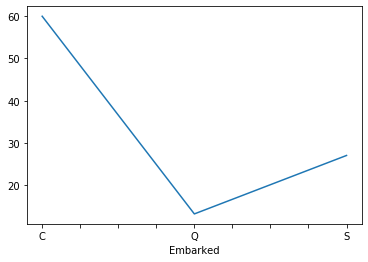

In [3]:
data = df.groupby('Embarked')['Fare'].mean()
data.plot() 
plt.show()

Indeed, the plot is difficult to interpret. A line plot is a poor choice for this type of data, there are meaningless ticks, and no axis label.

Therefore, the `micplot` package was developed, with three advantages:
  1. It automatically makes choices that make the plot much easier to interpret
  1. It makes the up the plot area nicely, by removing fluff, so it is easer to read.
  1. It is fully customizable if something is not to your wishes
  
## Creating focus
In plotting, it is important to make clear what the point of the plot is. `micplot` does this in two ways:
1. From the data, it infers a focus point, by sorting and highlighting data, and  
1. It makes the plot clearer, by annotating when necessary and removing fluff, such as unnecessary ticks and the frame.



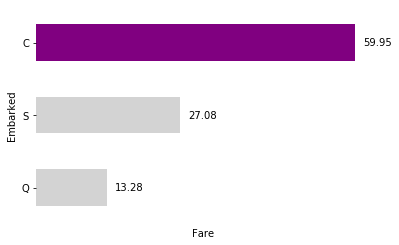

In [4]:
vis = micplot.visualize(data)
plt.show()

## The plot is still fully customizable
If the plot is not fully to your liking, the `Visualization` object that is returned contains all choices as attributes, including the axis, which can still be altered. In the example below, we alter the plottype and the bars which are highlighted. 

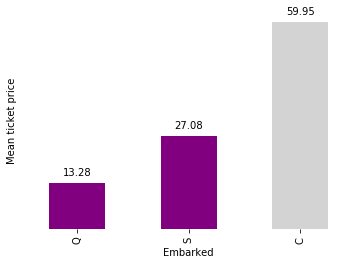

In [5]:
vis = micplot.visualize(data, plottype='vertical_bar', highlight=[0, 1])
vis.ax.set_ylabel('Mean ticket price')
plt.show()

Other options that can be altered are in the documentation:

In [6]:
?micplot.Visualization

Init signature:
micplot.Visualization(
    data,
    plottype=None,
    highlight=None,
    highlight_color='purple',
    highlight_type=None,
    sorting=None,
    annotated=None,
    strfmt=None,
    **kwargs,
)
Docstring:     
Visualize the data and hold all choices as attributes.

Fully customizable through its iniatilization and its attributes
Init docstring:
Initialize the visualization.

Parameters
----------
data : pd.Series or pd.DataFrame
    The data that is to be visualized
plottype : str, optional
    The type of plot to use. By default, this is inferred from the data(type). 
    Must be one of:
        - 'bar'
        - 'vertical_bar'
        - 'waterfall'
        - 'line'
        - 'scatter'
        - 'bubble'
        - 'pie'
        - 'composition_comparison'
highlight : iterable, optional
    Iterable of indices of the values which should be highlighted. By default, is top value
highlight_color : str, optional
    Color str in which to highlight some values. The defaul

# `micplot` contains some more useful plottypes
Above, we already saw the bar chart that is often very useful to make a point. Below, we show other plottypes and when `micplot` uses them.

## Waterfall charts for compositions
Waterfall charts are a good choice to show how the total group composition is. Note how `micplot` automatically infers this from the fact that the data contains percentages that add up to 100%.

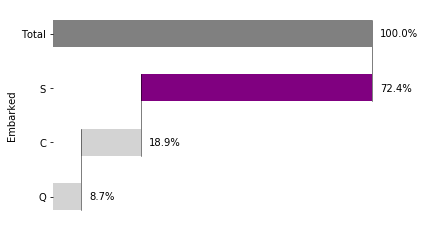

In [7]:
data = df['Embarked'].value_counts(normalize=True)
micplot.visualize(data)
plt.show()

## Vertical bars for short timeseries data
Bar charts are the plot of choice for time series data with not too many points. `micplot` infers this from the Index of the data. 
Note how in the plot below the legend is placed outside the plot to prevent the legend from overlapping with the data. The highlight specifies that data point to highlight if there is only one Series, but the column to highlight if multiple Series are compared.

In [8]:
size = 6
columnnames = ['Cars', 'Bikes', 'Buses', 'Planes']
test_data = pd.DataFrame(10*np.random.rand(size, 4), index=pd.date_range('20190101', periods=size), columns=columnnames)

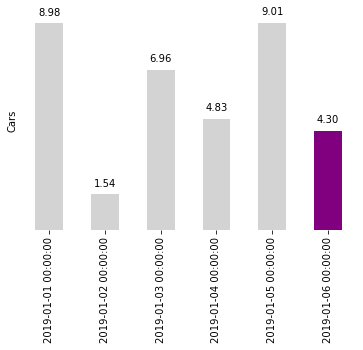

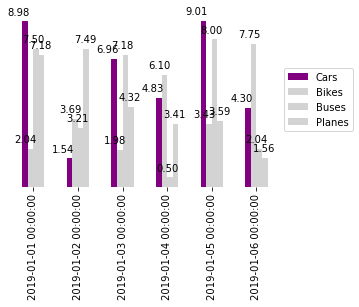

In [9]:
micplot.visualize(test_data['Cars'], highlight=-1)
plt.show()
micplot.visualize(test_data, highlight=0)
plt.show()

## Line chart for longer timeseries data
The bar chart would become unreadable if the time series data were longer, so `micplot` changes the plottype to a line plot.

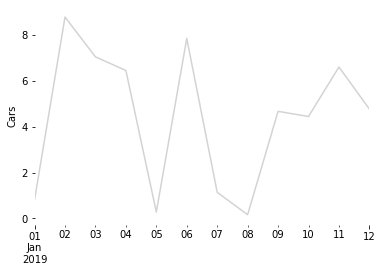

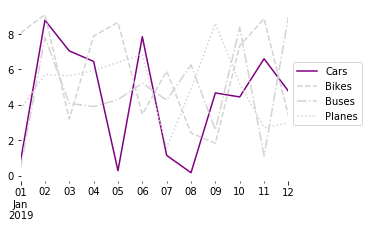

In [10]:
size = 12
test_data = pd.DataFrame(10*np.random.rand(size, 4), index=pd.date_range('20190101', periods=size), columns=columnnames)

micplot.visualize(test_data['Cars'], highlight=-1)
plt.show()
micplot.visualize(test_data, highlight=0)
plt.show()

## Scatter plots to investigate the relationship between two series

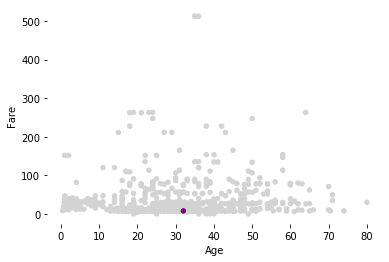

In [11]:
micplot.visualize(df[['Age', 'Fare']])
plt.show() 

If there are only a few datapoints in the plot, the points are also labeled with their index.

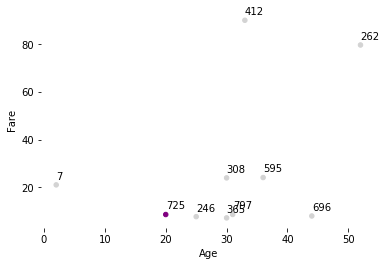

In [12]:
micplot.visualize(df[['Age', 'Fare']].sample(15))
plt.show() 

If there is a third column, this is turned into a bubble chart, where the third column determines the marker size. Here we see that `micplot` gives the legend a title when appropriate.

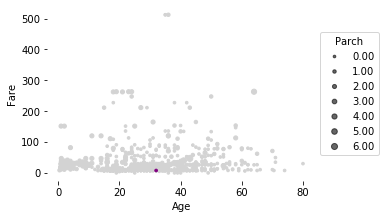

In [13]:
micplot.visualize(df[['Age', 'Fare', 'Parch']])
plt.show() 

## Composition comparison can show how subpopulations differ
If we quickly want to infer whether subgroups have the same distribution, we can use a stacked bar chart. `micplot` automatically chooses this if the data to visualize is a DataFrame where each column is a percentage Series.


In [14]:
data = (df.groupby('Pclass')['Survived'].value_counts(normalize=True)
        .unstack(level='Pclass')
       )
display(data)

Pclass,1,2,3
Survived,,,
0,0.37037,0.527174,0.757637
1,0.62963,0.472826,0.242363


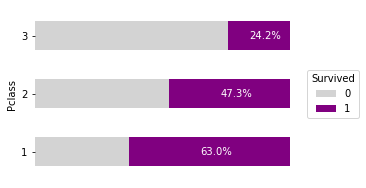

In [15]:
vis = micplot.visualize(data)

## Pie chart works as expected

TypeError: A pie chart? Are you kidding me?

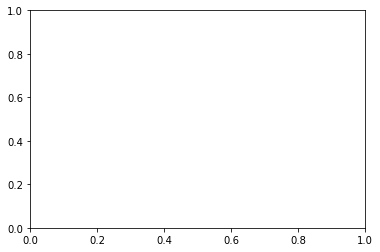

In [16]:
micplot.visualize(df['Embarked'].value_counts(), plottype='pie')